## CUMULATIVE RETURNS

##### Una tremenda forma para comparar el desempeño de dos activos es poner sobre la mesa el retorno acumulado de ambos. Para poner en práctica se utilizarán dos empresas completamente distintas: Alphabet y Texas RoadHouse.

In [3]:
# librerias indispensables para trabajar
import numpy as np
import pandas as pd
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [10]:
# definimos un rango de fecha
start = dt.datetime(2018,2,20)
end = dt.datetime.now()

# obteniendo la data de ambos activos
stocks = ['TXRH', 'GOOGL']
df = pdr.get_data_yahoo(stocks, start, end)
df.head()

[*********************100%***********************]  2 of 2 completed


Adj Close                 Close             \
                               GOOGL       TXRH      GOOGL       TXRH   
Date                                                                    
2018-02-20 00:00:00-05:00  55.179501  52.548134  55.179501  56.910000   
2018-02-21 00:00:00-05:00  55.687500  52.317295  55.687500  56.660000   
2018-02-22 00:00:00-05:00  55.494999  52.095688  55.494999  56.419998   
2018-02-23 00:00:00-05:00  56.404499  52.889774  56.404499  57.279999   
2018-02-26 00:00:00-05:00  57.185001  53.065212  57.185001  57.470001   

                                High                   Low             \
                               GOOGL       TXRH      GOOGL       TXRH   
Date                                                                    
2018-02-20 00:00:00-05:00  55.814499  58.029999  54.500000  56.500000   
2018-02-21 00:00:00-05:00  56.810001  58.270000  55.375500  54.320000   
2018-02-22 00:00:00-05:00  56.272999  58.139999  55.257500  55.980000   
2018-02-23 00:00:00-05:00  56.450001  57.419998  55.422001  56.400002   
2018-02-26 00:00:00-05:00  57.209999  57.779999  56.466999  56.790001   

                                Open               Volume           
                               GOOGL       TXRH     GOOGL     TXRH  
Date                                                                
2018-02-20 00:00:00-05:00  54.638000  57.689999  33754000  1436800  
2018-02-21 00:00:00-05:00  55.455002  55.500000  41486000  2708100  
2018-02-22 00:00:00-05:00  55.958500  57.090000  28010000  1130800  
2018-02-23 00:00:00-05:00  55.932999  56.759998  25292000  1148700  
2018-02-26 00:00:00-05:00  56.592999  57.540001  30912000  1051200

In [5]:
# nos interesa el retorno diario, para luego calcular el retorno acumulado
returns = df['Adj Close'].pct_change()
returns.tail()

,GOOGL,TXRH
Date,,
2023-02-13 00:00:00-05:00,0.000423,0.013872
2023-02-14 00:00:00-05:00,0.000740,0.025508
2023-02-15 00:00:00-05:00,0.023870,-0.005813
2023-02-16 00:00:00-05:00,-0.014751,0.007956
2023-02-17 00:00:00-05:00,-0.012145,-0.007894


In [6]:
acumulative_returns = (1 + returns).cumprod() - 1
acumulative_returns.tail()

,GOOGL,TXRH
Date,,
2023-02-13 00:00:00-05:00,0.714586,0.947167
2023-02-14 00:00:00-05:00,0.715855,0.996836
2023-02-15 00:00:00-05:00,0.756812,0.985227
2023-02-16 00:00:00-05:00,0.730896,1.001022
2023-02-17 00:00:00-05:00,0.709874,0.985227


##### En estos 5 años, un restaurante especializado en carne asada, con un market cap de casi 7 billones de USD al 17/2/23, generó un rendimiento superior que Alphabet, un gigante técnológico valorado por sobre el trillon de USD.

In [8]:
# ahora a graficar la data
import matplotlib.pyplot as plt
%matplotlib inline

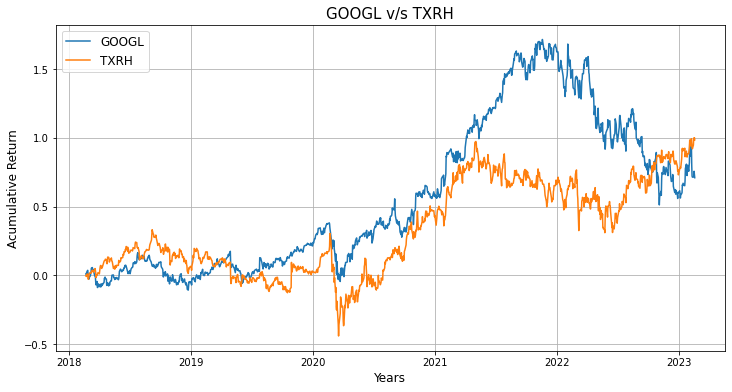

In [9]:
googl = acumulative_returns['GOOGL']
txrh = acumulative_returns['TXRH']

plt.figure(figsize = (12, 6)) # tamaño del gráfico
plt.plot(googl, label='GOOGL')
plt.plot(txrh, label='TXRH')

plt.title('GOOGL v/s TXRH', fontsize = 15) # título
plt.ylabel('Acumulative Return', fontsize = 12) # etiqueta eje y
plt.xlabel('Years', fontsize = 12) # etiqueta eje x
plt.legend(loc = 2, fontsize = 12) 
plt.grid() # cuadrículas
plt.show()